# [E-01]RockPaperScissor

### 목차
1. 데이터 준비하기   
  1-1. 데이터 만들기   
  1-2. 디렉토리 만들기   
2. 데이터 불러오기 + Resize 하기   
  2-1. 이미지 Resizing 메서드 정의   
  2-2. 이미지 Resizing      
  2-3. 데이터 불러오기    
3. 모델 생성
4. 모델 학습
5. Test Set 데이터로 학습된 모델 평가
6. 최종 평가 및 정확도 확인
7. 회고


### 루브릭 평가 기준
|평가문항|상세기준|
|------|---|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?|트레이닝이 정상적으로 수행되었음|
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?|데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
|3. 분류모델의 Test Accuracy가 기준 이상 높게 나왔는가?|60% 이상 도달하였음|   
<br/>

----


### 1. 데이터 준비하기
#### 1-1. 데이터 만들기
* [구글 teachable machine](https://teachablemachine.withgoogle.com/) 
* 쉽게 데이터 만들 수 있음 

* 데이터 만들 때 주의사항
  * 여러 각도에서 찍기
  * 여러 크기로 찍기
  * 혼자서 하는데에 한계가 있으니 여러 사람과 함께 하기
  * **좋은 데이터가 좋은 결과를 낳는다는 것을 기억하기**

#### 1-2. 디렉토리 만들기
클라우드에 실습용 디렉토리 올리기
```
# 디렉토리 만들기
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/paper

$ ls -l ~/aiffel/rock_scissor_paper

```

> mkdir -p : make directory의 약자. 원하는 이름으로 디렉토리를 생성하는 명령어. 
> -p 옵션을 주면 '디렉토리를 생성할 수 없습니다' 라는 메시지가 나오지 않고 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성함

```
# 원하는 디렉토리로 이동 =3
$ cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
$ unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
$ cd  ~/aiffel/rock_scissor_paper/scissor
$ unzip scissor.zip

$ cd  ~/aiffel/rock_scissor_paper/paper
$ unzip paper.zip

```


### 2. 데이터 불러오기 + Resize 하기
*`🙋🏽‍♀️ "코드를 하나씩 뜯어보기 전에 전체적으로 어떤 라이브러리들이 있는지 먼저 하나씩 알아보고 싶었습니다."`*

* tensorflow
  * 다양한 작업에 대해 데이터 흐름 프로그래밍을 위한 오픈소스 소프트웨어 라이브러리

* Numpy
  * NumPy는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 파이썬의 라이브러리. 
  * 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
* matplotlib  
  * Python 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리.

* os
  * os 모듈은 운영 체제와 상호 작용하기 위한 수십가지 함수들을 제공.
  * import os
  * os.open()이 내장 open()을 가리는 것을 피할 수 있음

* glob.glob()
  * 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환. 단, 조건에 정규식을 사용할 수 없으며 엑셀 등에서도 사용할 수 있는 '*'와 '?'같은 와일드카드만을 지원

* googld.colab
* IPython.display 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os, glob

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# from IPython.display import Image
# Image('/content/drive/MyDrive/ColabNotebooks/Exploration/E_01/train3600/Rock/0.jpg')



* 아직 Jupyter Notebook Cloud 시스템에 익숙하지 않아서 **이미지를 한꺼번에 올리고 복사하고 삭제하는거 어려웠습니다.** 
* 어떤 대안이 있을까 고민하다가 Colab을 생각하게되었고, Google Drive 를 마운트하여 사용할 수 있다고해서 선택했습니다.
* 하지만.. 데이터가 적을 때는 크게 느끼지 못했던 속도를 1,000~2,000장이 넘어가는 훈련을 할 때 체감하게 되었고, 이번 프로젝트까지만 Colab 으로 하고 다음부터는 **Cloud Jupyter**로 다시 돌아가기로 다짐하였습니다.    

**Google Drive를 마운트하며 만났던 문제**
* 아무리 불러도 데이터가 나오지 않았습니다. 코드에서는 전혀 문제가 없어서 이상하다고 생각하던 그 찰나, 멍하니 화면을 보다가 Exploration 폴더 앞에 붙어있던 띄어쓰기를 발견했습니다. 띄어쓰기를 제거하고 데이터를 확인했습니다.

#### 2-1. 이미지 Resizing 메서드 정의

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')

    print(len(images), ' images to be resized.')

    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img).convert('RGB')
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'JPEG')

    print(len(images), ' images resized.')

#### 2-2. 이미지 Resizing
    

In [3]:

from PIL import Image

image_dir_path = "/aiffel/aiffel/Exploration/E_01/train3600/Scissors"
resize_images(image_dir_path)
print("Scissors image resized (28 X 28)")

image_dir_path = "/aiffel/aiffel/Exploration/E_01/train3600/Rock"
resize_images(image_dir_path)
print("Rock image resized (28 X 28)")

image_dir_path = "/aiffel/aiffel/Exploration/E_01/train3600/Paper"
resize_images(image_dir_path)
print("Paper image resized (28 X 28)")

1200  images to be resized.
1200  images resized.
Scissors image resized (28 X 28)
1200  images to be resized.
1200  images resized.
Rock image resized (28 X 28)
1200  images to be resized.
1200  images resized.
Paper image resized (28 X 28)


#### 2-3. 데이터 불러오기 

In [4]:
def load_data(img_path, number_of_data=3600):
    img_size = 28
    color = 3

    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/Scissors/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0 
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/Rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1 
        idx = idx + 1


    for file in glob.iglob(img_path + '/Paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2 
        idx = idx + 1

    print('학습 데이터(x_train)의 이미지 개수는 {} 개 입니다.'.format(idx))
    return imgs, labels

image_dir_path = "/aiffel/aiffel/Exploration/E_01/train3600/"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))


학습 데이터(x_train)의 이미지 개수는 3600 개 입니다.
x_train shape: (3600, 28, 28, 3)
y_train shape: (3600,)


라벨:  0


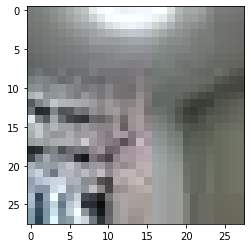

In [5]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

### 3. 모델 생성

In [6]:
n_channel_1=128
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

param = 이미지에서 가져온 특징   
channel layer 차이  
dense  

Layer dense  
Maxpooling  


### 4. 모델 학습

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
113/113 [==============================] - 3s 4ms/step - loss: 0.9051 - accuracy: 0.5556
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7894
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8681
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9233
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9514
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9717
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9786
Epoch 8/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9889
Epoch 9/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9908
Epoch 10/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9956

### 5. Test Set 데이터로 학습된 모델 평가

In [8]:
image_dir_path = "/aiffel/aiffel/Exploration/E_01/test/Scissors"
resize_images(image_dir_path)
print("Scissors image resized (28 X 28)")

image_dir_path = "/aiffel/aiffel/Exploration/E_01/test/Rock"
resize_images(image_dir_path)
print("Rock image resized (28 X 28)")

image_dir_path = "/aiffel/aiffel/Exploration/E_01/test/Paper"
resize_images(image_dir_path)
print("Paper image resized (28 X 28)")

50  images to be resized.
50  images resized.
Scissors image resized (28 X 28)
50  images to be resized.
50  images resized.
Rock image resized (28 X 28)
50  images to be resized.
50  images resized.
Paper image resized (28 X 28)


In [9]:
def load_test_data(img_path, number_of_data = 150):
    img_size = 28
    color = 3

    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/Scissors/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0 
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/Rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1 
        idx = idx + 1


    for file in glob.iglob(img_path + '/Paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2 
        idx = idx + 1

    print('학습 데이터(x_train)의 이미지 개수는 {} 개 입니다.'.format(idx))
    return imgs, labels

image_dir_path = "/aiffel/aiffel/Exploration/E_01/test"
(x_test, y_test) = load_test_data(image_dir_path)
x_test_norm = x_test/255.0

print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))


학습 데이터(x_train)의 이미지 개수는 150 개 입니다.
x_test shape: (150, 28, 28, 3)
y_test shape: (150,)


### 6. 최종 평가 및 정확도 확인
##### Training Data 3600개로 학습 시켰을 때 + n_channel, dense, Epoch 조절

In [10]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

5/5 - 0s - loss: 1.3595 - accuracy: 0.7333
test_loss: 1.359475016593933
test_accuracy: 0.7333333492279053


In [11]:
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("train_loss: {}".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

113/113 - 0s - loss: 0.0170 - accuracy: 0.9978
train_loss: 0.016988981515169144
train_accuracy: 0.9977777600288391


### 7. 회고

#### Accuracy : 73.33%
#### Loss : 1.3594


**첫 Exploration 진행 소감**   
`".....🤦🏽... <- 처음에 이런 상태였는데 가끔은 몰라도 일단고! 라는 자세가 필요하다는 것도 깨달았습니다. 다른 분들의 도움으로 해낼 수 있었고 함께 공부하는 힘에 대해 다시 한 번 느낄 수 있었습니다."`*
<br/>
<br/>

**이번 프로젝트에서 어려웠던 점**
* 아직 파이썬도 익숙치 않고 머신러닝, 딥러닝도 처음인데 다양한 내용이 많이 나와서 시작 자체가 조금 어려웠습니다.
* 아직 Jupyter Notebook Cloud 시스템에 익숙치 않아서 **이미지를 한꺼번에 올리고 복사하고 삭제하는거 어려웠습니다.**    
<br/>
<br/>

**프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점**
* 함께 공부하는게 얼마나 시너지효과가 나는지 알 수 있었습니다. 
* Layer층을 더 쌓거나, Epoch 값을 바꿔서 데이터의 정확도를 변경해볼 수 있다는 것을 알게되었는데, 아직 명확하게 이해된 상태가 아닙니다. 좀 더 공부가 필요하다고 생각됩니다. 
* 무작정 데이터를 늘린다고, 무작정 많이, 복잡하게 학습시킨다고 정확도가 올라가는 것이 아니라는 걸 깨달았습니다. 
* 기계를 훈련시키는 것에 정말 많은 어깨 결림과 에너지와 인내심이 필요하다는 것도 알게되었습니다. 😞 
<br/>
<br/>

**루브릭 평가 지표를 맞추기 위해 시도한 것들** 
1) 훈련 데이터 세트를 점차 증가시켰습니다. 
  * 첫번째 시도. 300개 / test_accuracy: 0.3466 / test_loss: 2.5690   
  * 두번째 시도. 600개 / test_accuracy: 0.3266 / test_loss: 5.8913   
  * 세번째 시도. 600개 / test_accuracy: 0.3799 / test_loss: 3.6919 (괜찮은 데이터들로만 다시 구성해서 진행)   
  * 네번째 시도. 1800개 / test_accuracy: 0.3866 / test_loss: 3.1824
  * 다섯번째 시도. 2700개 / test_accuracy: 0.4666 / test_loss: 2.1601
  * 여섯번째 시도. 3600개 / test_accuracy: 0.6600 / test_loss: 1.9780  
  * 일곱번째 시도. 3600개 / test_accuracy: 0.7800 / test_loss: 1.3095 (과적합)  
  * 여덟번째 시도. 3600개 / test_accuracy: 0.7333 / test_loss: 1.3594 (Epoch 값 조절)  
  
2) 처음 600개로 시도했을 때, 300개를 시도했을 때보다 정확도가 낮아져 그때 **좋은 데이터가 좋은 결과를 낳는다** 를 기억하고 데이터를 선별했습니다.   
3) 테스트 세트를 가위바위보 클래스별로 50개씩으로 줄여서 조절하였습니다.   
4) 모델 설계 조절 없이 3,600개까지 데이터 늘려서 학습시킨 후, 테스트 했을 때 정확도 66% 까지 확인하였습니다.   
5) Epoch 수를 15로 조절했더니 과적합이 나와서 n_channel, dense, Epoch 값을 다시 조절하여 정확도를 73%까지 맞추었습니다.   
<br/>
<br/>

**앞으로 더 공부할 내용**
* 데이터세트 종류         
* test_loss값에 대한 이해    
* 모델 생성에서 디테일한 코드 파보기    
  * Channel, Layer, Dense, 128, 64, 32 등.. 각 의미에 대해 자세히 알아보기   
<br/>
<br/>

**궁금한 사항** 
* Training Set 학습시킬 때, 4,800장이 한 폴더 안에 있고 그 안에서 동일한 결과를 내기 위해 랜덤으로 뽑아주는 기능이 있나요?
  * 같은 LMS조, 진환님과 영철님과 이야기하면서 새롭게 얻은 아이디어가 if-break. 나중에 시도해봐야겠습니다. 

* 똑같이 데이터를 학습시키고 테스트하는데, 정확도가 차이나는 이유가 뭘까요?
  * 아마도 모두 정제되어있는 데이터만 있는 것이 아니기 때문일거라고 생각합니다. 조금 더 찾아봐야겠어요!

* 이미지 크기를 28x28로 줄이는 이유
* training set / Validation / test로 나누지 않은이유
<br/>

** **